In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
haberman = pd.read_csv(r"C:\Users\gowth\Downloads\haberman.csv",names =["Age","Operation_age","Lymph_nodes","Survival_status"])
print(haberman)

     Age  Operation_age  Lymph_nodes  Survival_status
0     30             64            1                1
1     30             62            3                1
2     30             65            0                1
3     31             59            2                1
4     31             65            4                1
..   ...            ...          ...              ...
301   75             62            1                1
302   76             67            0                1
303   77             65            3                1
304   78             65            1                2
305   83             58            2                2

[306 rows x 4 columns]


In [3]:
print(haberman.shape) #  data-points and features

(306, 4)


In [4]:
print(haberman.columns) # columns in the data or features in the data 

Index(['Age', 'Operation_age', 'Lymph_nodes', 'Survival_status'], dtype='object')


In [5]:
haberman["Survival_status"].value_counts() # this tells how many people survived (1) more than 5 yrs and (2) less than five yrs.

1    225
2     81
Name: Survival_status, dtype: int64

In [6]:
haberman["Operation_age"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Operation_age, dtype: int64

In [7]:
haberman["Lymph_nodes"].value_counts()


0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Lymph_nodes, dtype: int64

In [8]:
haberman["Age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64

# 2-D Scatter Plot with matplotlib 

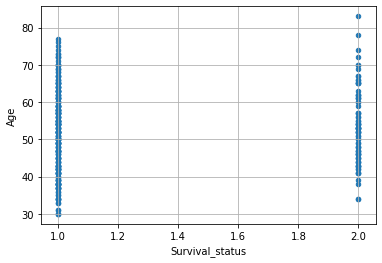

In [9]:
# plotting survival and age with matplotlib but can't differentiate how many people have survived 
haberman.plot(kind="scatter",x="Survival_status",y="Age")
plt.grid()
plt.show()

# 2-D Scatter Plot with seaborn 

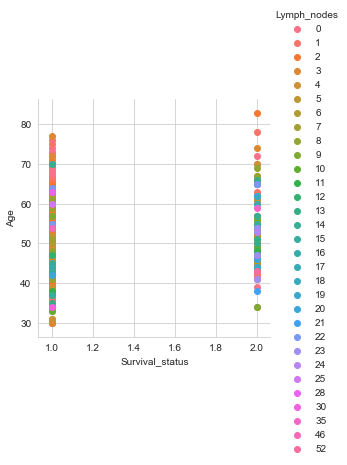

In [10]:
# used seaborn for better understanding we get color to differentiate and adding legend will give information about the color codes in the plot. 
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Lymph_nodes" , height =4 ).map(plt.scatter,"Survival_status","Age").add_legend()
plt.show()

# 2-D Scatter plot with matplotlib 

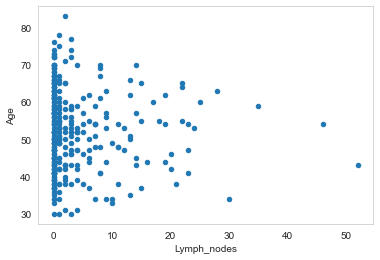

In [11]:
#plotting with matplotlib but can't differntiate the how many comes in 1 or 2 as survival status 
haberman.plot(kind="scatter",x="Lymph_nodes",y="Age")
plt.grid()
plt.show()   


# 2-D Scatter Plot with seaborn

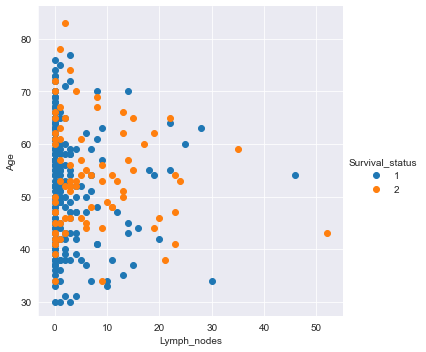

In [12]:
# used seaborn for better understanding we get color to differentiate and adding legend will give information about the colorcodes in the plot . 
sns.set_style('darkgrid')
sns.FacetGrid(haberman, hue='Survival_status', height= 5).map(plt.scatter,"Lymph_nodes","Age").add_legend();
plt.show()



#  Pair-plot

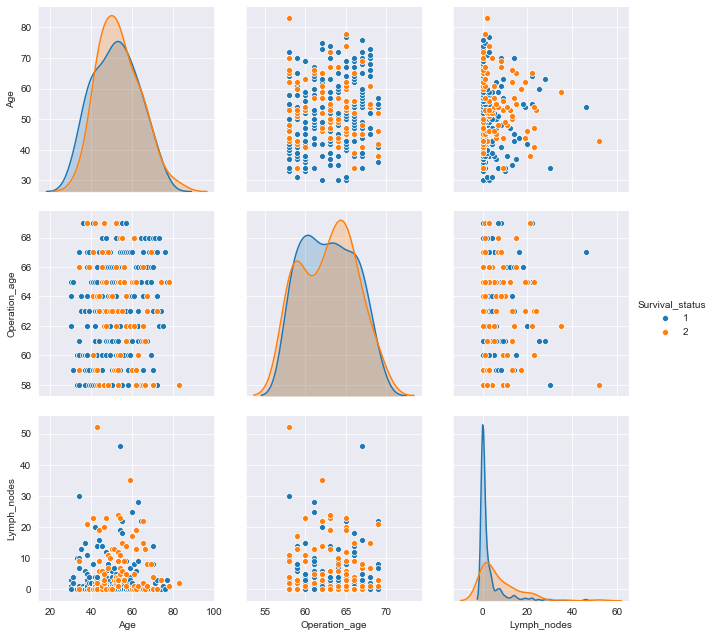

In [13]:
#pair-plotting
plt.close()
sns.set_style('darkgrid')
sns.pairplot(haberman , hue='Survival_status',height= 3,vars=['Age','Operation_age','Lymph_nodes']);
plt.show()

# Observation 
1. Here , plot 3 gives some classification between survival than other plots . As there is a overlapping of data points but still it clasasify the data points . 
2. Plot 7 is same as plot 3 .if we rotate the graph 90 degrees clockwise and interchange the label.

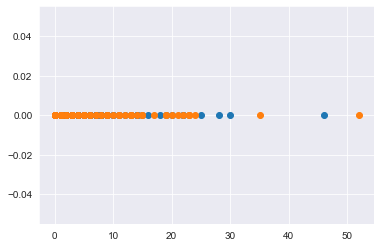

In [14]:
#plotting one -dimesional 
import numpy as np
haberman_survival_1= haberman.loc[haberman["Survival_status"]==1];
haberman_survival_2= haberman.loc[haberman["Survival_status"]==2];
plt.plot(haberman_survival_1["Lymph_nodes"],np.zeros_like(haberman_survival_1['Lymph_nodes']),'o')
plt.plot(haberman_survival_2["Lymph_nodes"],np.zeros_like(haberman_survival_2['Lymph_nodes']),'o')
plt.show()


# Histogram, PDF, CDF

C:\Users\gowth\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


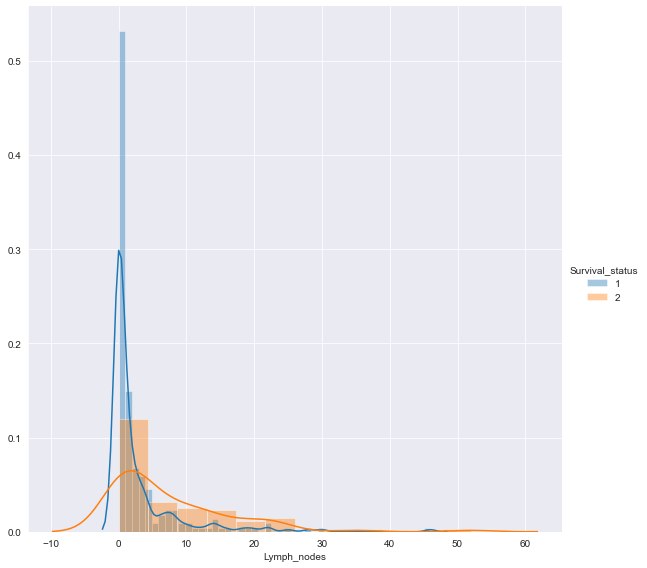

In [15]:
sns.FacetGrid(haberman,hue='Survival_status',size=8).map(sns.distplot,'Lymph_nodes').add_legend()

# Observation 
1.Here , I can say that people of lymph_nodes in the body between (0-7) approx or lesss lymph_node have chances to survive more than 5 years  and vice versa .But it is still hard to classify it as some data points overlap each other .

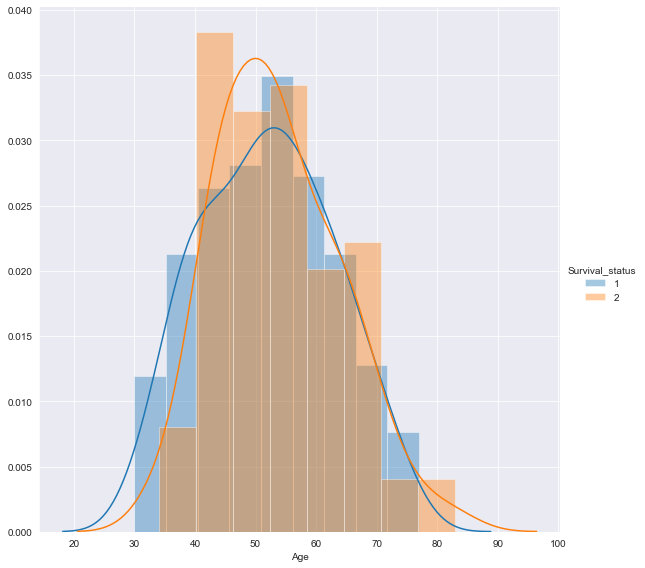

In [16]:
sns.FacetGrid(haberman,hue='Survival_status',height=8).map(sns.distplot,'Age').add_legend()

# Observation 

1.between age (30-75) the survival and death are overlapping i.e same .It doesn't give any intution wrt to objective  


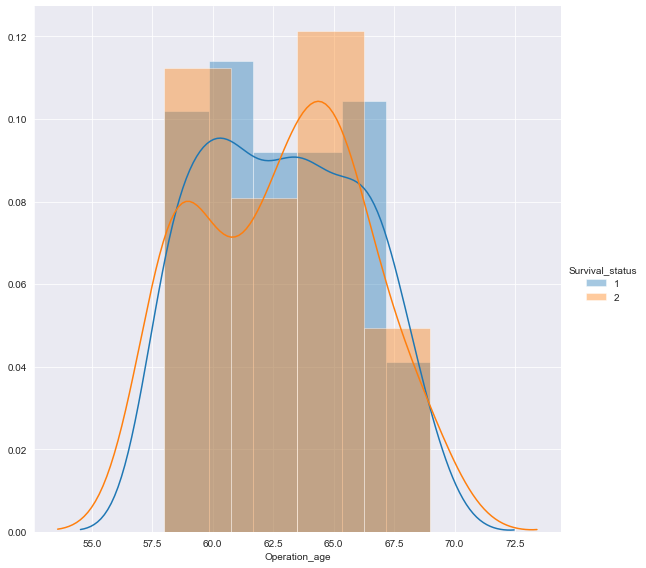

In [17]:
sns.FacetGrid(haberman,hue='Survival_status',height=8).map(sns.distplot,'Operation_age').add_legend()

# Observation

1.Both the pdf are overlapping with each other .We cannot interpet anything from it wrt to our objective 



In [18]:
counts,bin_edges= np.histogram(haberman_survival_1['Lymph_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


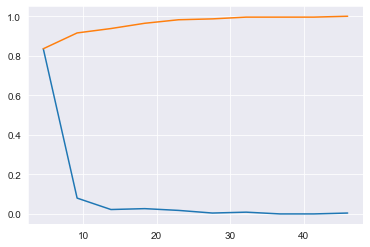

In [19]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


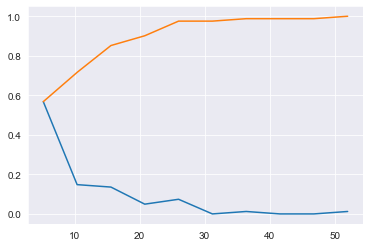

In [20]:
counts, bin_edges = np.histogram(haberman_survival_2['Lymph_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

source - https://www.google.com/search?rlz=1C1CHBF_enIN833IN833&biw=1600&bih=789&sxsrf=ACYBGNRDSJv5WY1Mlk1yr575PgPtaUG8RQ%3A1581772745936&ei=ye9HXtDoOIGL4-EPloWOwAw&q=lymph+nodes+in+breast+increases&oq=lymph+nodes+in+breast+incres&gs_l=psy-ab.1.1.33i160l2.34187.35778..37895...0.4..0.1122.2888.1j2j2j6-1j1......0....1..gws-wiz.......0i71j0i20i263j0j0i67j0i22i30j33i22i29i30.4Fujws9C6lk
source(understanding) -if the lymph node increases the chances of survival is less .



Observation 
1. 85% approx .of people have a chance to live more than 5  if no. of lymph nodes are less than 5 .
2. As the number of lymph nodes increases >40 .The chances of survival becomes less as it results to 100% chances of survival      have less chances .
2. Between (80-85)% of people have good survival chances if they have less no . of lymph nodes .

In [21]:
counts,bin_edges= np.histogram(haberman_survival_2['Lymph_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


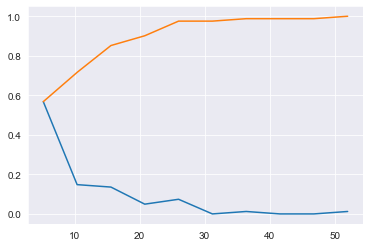

In [22]:
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

# Mean, Variance and Std-dev

# Observation 
1)Nearly 55% people with lymph nodes less than 5 will have a short survival less than 5 years .
2)Nearly 100% prople with lymph nodes less >40 will gradually have a less survival priod .


In [23]:

print(np.mean(haberman_survival_1))

Age                52.017778
Operation_age      62.862222
Lymph_nodes         2.791111
Survival_status     1.000000
dtype: float64


In [24]:
print("mean:")
print(np.mean(haberman_survival_1["Lymph_nodes"]))
# if an outlier is there in the data then?
print("mean with outlier")
print(np.mean(np.append(haberman_survival_1["Lymph_nodes"],100)))

mean:
2.7911111111111113
mean with outlier
3.2212389380530975


In [25]:
print("mean:")
print(np.mean(haberman_survival_2["Lymph_nodes"]))
print(np.mean(np.append(haberman_survival_2["Lymph_nodes"],100)))

mean:
7.45679012345679
8.585365853658537


# Observation

1. long survival(2.79) are probabily less than short survival (7.45)
2. An outlier or an error in data will not affect that much on the mean.

In [39]:
import statistics 
print("Standard deviation :")
print(np.std(haberman_survival_1["Lymph_nodes"]))
print(np.std(haberman_survival_2["Lymph_nodes"]))
print("Variance :")
print(statistics.variance(haberman_survival_1["Lymph_nodes"]))
print(statistics.variance(haberman_survival_2["Lymph_nodes"]))


Standard deviation :
5.857258449412131
9.128776076761632
Variance :
34.460634920634924
84.37623456790124


# Observation

1. Spread of data is more of short survival(9.12) than long survival(5.85)
2. we can measure the variance too. As std deviation is just the sqrt(Variance) .

# Median, Percentile, Quantile, IQR, MAD

In [27]:
print("Median :")
print(np.median(haberman_survival_1["Lymph_nodes"]))
print(np.median(haberman_survival_2["Lymph_nodes"]))


Median :
0.0
4.0


In [28]:
print('Median with outlier :')
print(np.median(np.append(haberman_survival_1["Lymph_nodes"],50)))
print(np.median(np.append(haberman_survival_2["Lymph_nodes"],50)))

Median with outlier :
0.0
4.0


# Observation

1. Most of the long survival are found to be with average of no lymph nodes in them ("0 nodes ")
2. Similarly for short survival are found to be with average of  4 lymph nodes in them.

In [29]:
print("Quantile :")
print(np.percentile(haberman_survival_1["Lymph_nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_survival_2["Lymph_nodes"],np.arange(0,100,25)))

Quantile :
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


# Observation


1. 50% of long survived people have no nodes in them and 75% people have less than 3 .
2. 75% of short survived people have more than 12 nodes in them .

In [30]:
print("90th percentile")
print(np.percentile(haberman_survival_1["Lymph_nodes"],90))
print(np.percentile(haberman_survival_2["Lymph_nodes"],90))
      

90th percentile
8.0
20.0


# Observation

1. At 90th%  if nodes are greater than 8 then it is detected as long survival .
2. At 90th%  if nodes are greater than 20 then it is detected as short survival.

In [31]:
from statsmodels import robust 
print("MAD :") # effectless with outlier 
print(robust.mad(haberman_survival_1["Lymph_nodes"]))
print(robust.mad(haberman_survival_2["Lymph_nodes"]))


MAD :
0.0
5.930408874022408


# Observation
1. for long surival people have no deviation (zero deviation).
2. for short survival people have deviation of 5.

# Box plot and Whiskers

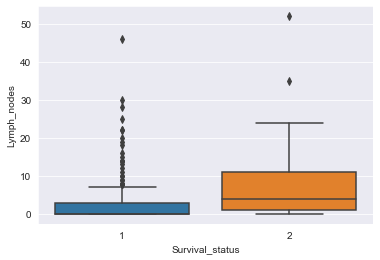

In [32]:
sns.boxplot(x='Survival_status',y="Lymph_nodes",data=haberman)
plt.show()

# Observation

1. For long survival , 50th % of the people have no nodes in them .75th percent of the people have nearly 3-4 nodes in them . The range of nodes in the long survival people is found to be (0-7).
2. Similarly for short survival, 25th % of the people have 1 or 2 .50 th percentile of the people have nearly 4 nodes. 75th % of people have nearly 12 nodes.The range of short survival people have (0-25 nodes).
3. If the node lies between 0-7 the chance of error of short survival people is 50% .

# ViolinPlots


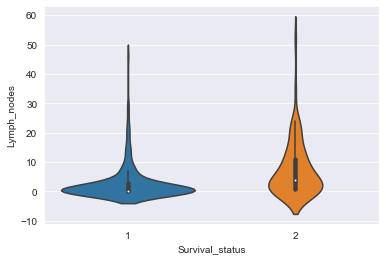

In [33]:
sns.violinplot(x='Survival_status',y='Lymph_nodes',data=haberman,size=8)
plt.show()

# Observation

1. It tells us how much the spread the data is distributed . As long survival is distributed mostly near in 0 nodes .It has threshold range from (0-7).
2. As short survival is distrubuted mostly near 4-5 nodes . The data is distributed till (0-25). It has threshold range from (4-12).

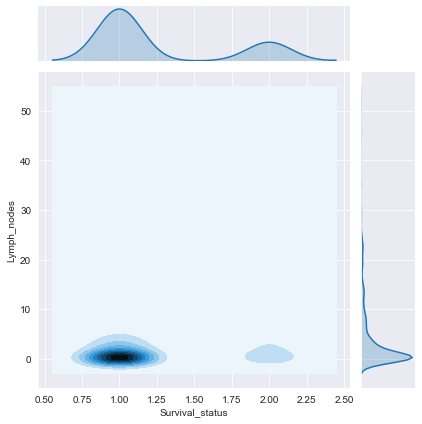

In [34]:
sns.jointplot(x="Survival_status", y="Lymph_nodes", data=haberman, kind="kde");
plt.show();

# Observation
1. It doesn't classify features effectively wrt to objective .

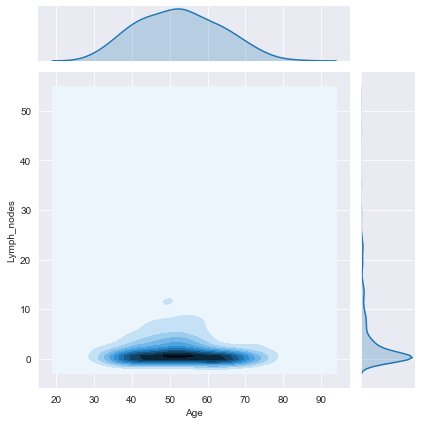

In [35]:
sns.jointplot(x="Age",y="Lymph_nodes",data=haberman,kind="kde");
plt.show();

# Observation
1. Here we can observe that  nearly (40-65) years old people (dense black area ) have nearly (0-4) lymph nodes in the body.